````{verbatim}
SPL       = Decl+
Decl      = VarDecl
          | FunDecl
VarDecl   = ('var' | Type) id  '=' FExp ';'
FunDecl   = id '(' [ FArgs ] ')' [ ':' RetType ] '{' VarDecl* Stmt+ '}'
RetType   = Type
          | 'Void'
Type      = BasicType
          | '[' Type ']'
          | id
BasicType = 'Int'
          | 'Bool'
          | 'Char'
FArgs     = [ FArgs ',' ] id [ ':' Type ]
Stmt      = 'if' '(' FExp ')' '{' Stmt* '}' [ 'else' '{' Stmt* '}' ]
          | 'while' '(' FExp ')' '{' Stmt* '}'
          | id [ Field ] '=' FExp ';'
          | FunCall ';'
          | 'return' [ FExp ] ';'
FExp      = Exp [ Field ]
Exp       = id
          | FExp Op2 FExp
          | Op1 FExp
          | int
          | char
          | 'False' | 'True'
          | '(' FExp ')'
          | FunCall
          | '[]'
Field     = '.' 'hd' | '.' 'tl'
FunCall   = id '(' [ ActArgs ] ')'
ActArgs   = FExp [ ',' ActArgs ]
Op2       = '+'  | '-' | '*' | '/'  | '%'
          | '==' | '<' | '>' | '<=' | '>=' | '!='
          | '&&' | '||'
          | ':'
Op1       = '!'  | '-'
int       = [ '-' ] digit+
id        = alpha ( '_' | alphaNum)*

var x = 1;
var y = False;

id(x) {
    return(x);
}

// scope 
// main



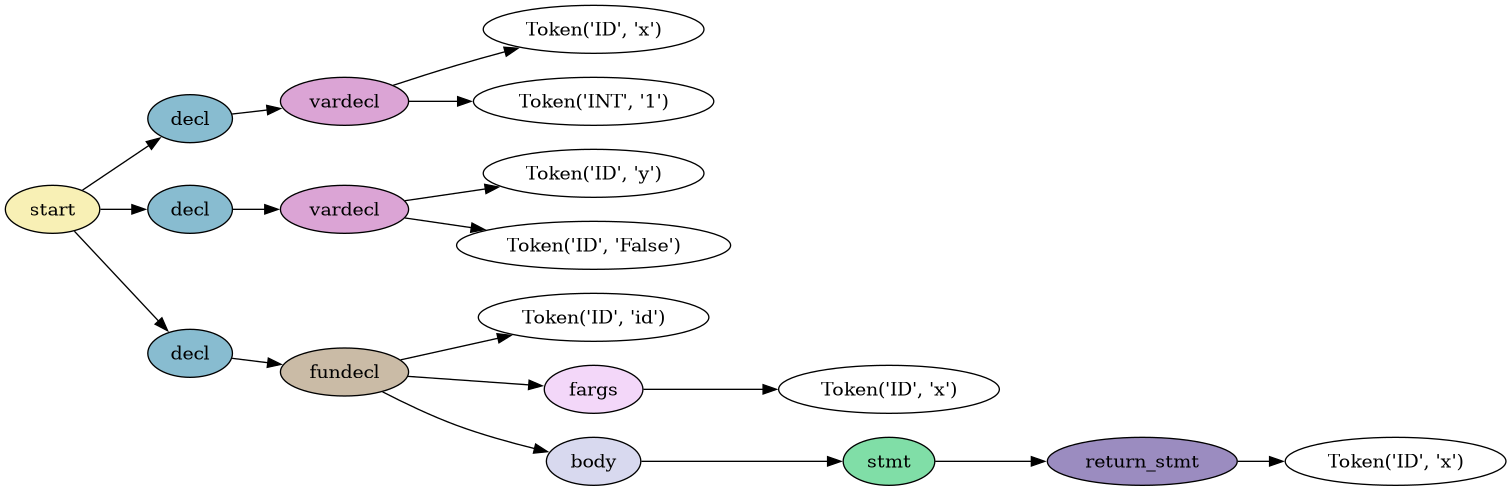

In [1]:
%reset -f 

from IPython.display import display
from PIL import Image
import os

import lark
from spl_parser import spl_parser as parser


def plot_prgm(prgm):
    tree = parser.parse(prgm)
    lark.tree.pydot__tree_to_png(tree, 'tree.png')
    display(Image.open('tree.png'))
    return tree


# for demo_path in os.listdir("demos"):
#     if demo_path == "infinite_type_shouldfail.spl" : continue
#     with open("demos/" + demo_path, mode='r') as f:
#         prgm = f.read()
#         print("--" + demo_path + "--")
#         print(prgm)
#         plot_prgm(prgm)

with open("demos/simple_well_typed.spl", mode='r') as f:
    prgm = f.read()
    print(prgm)
    tree =plot_prgm(prgm)

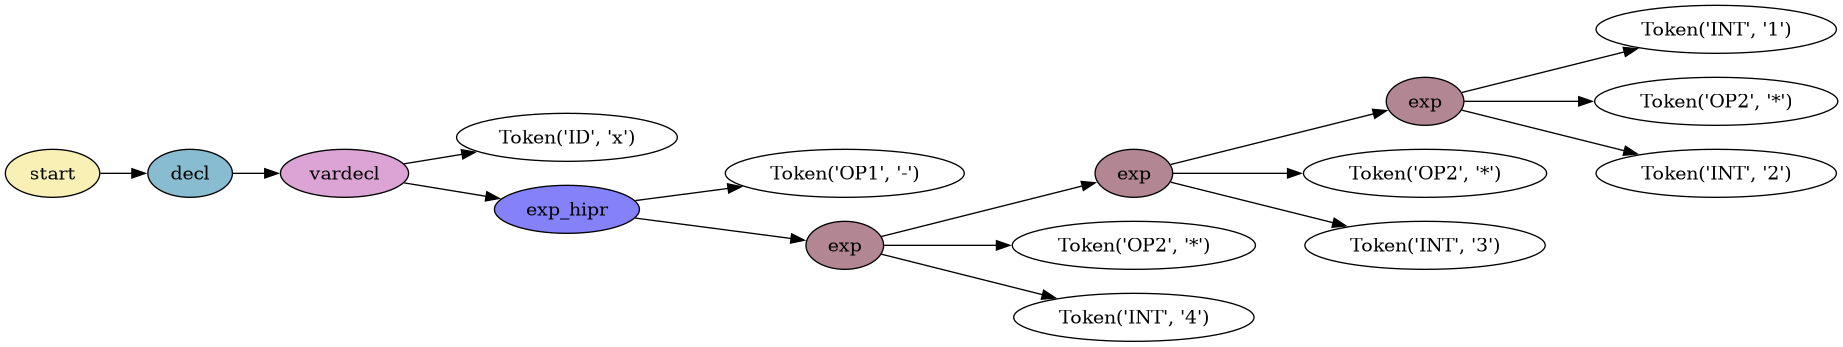

Tree('start', [Tree('decl', [Tree('vardecl', [Token('ID', 'x'), Tree('exp_hipr', [Token('OP1', '-'), Tree('exp', [Tree('exp', [Tree('exp', [Token('INT', '1'), Token('OP2', '*'), Token('INT', '2')]), Token('OP2', '*'), Token('INT', '3')]), Token('OP2', '*'), Token('INT', '4')])])])])])

In [2]:
plot_prgm("var x = -(1 * 2 * 3 * 4);")

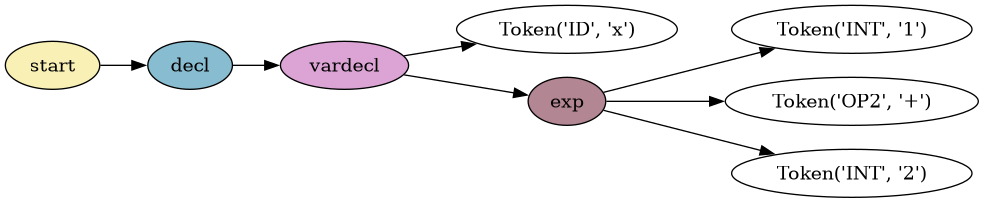

Tree('start', [Tree('decl', [Tree('vardecl', [Token('ID', 'x'), Tree('exp', [Token('INT', '1'), Token('OP2', '+'), Token('INT', '2')])])])])

In [3]:

plot_prgm("var x = 1 + 2;")

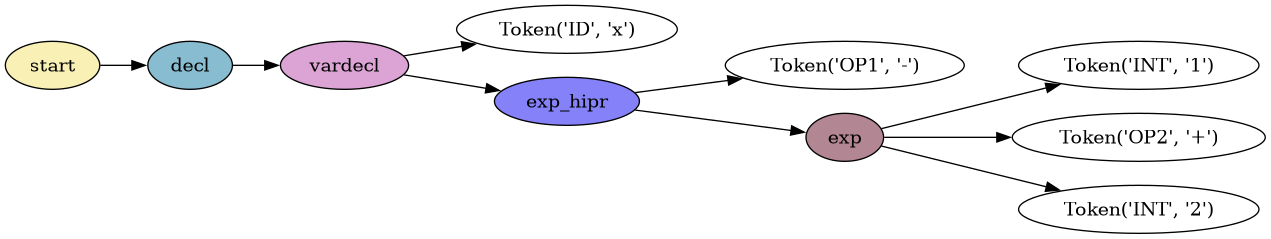

Tree('start', [Tree('decl', [Tree('vardecl', [Token('ID', 'x'), Tree('exp_hipr', [Token('OP1', '-'), Tree('exp', [Token('INT', '1'), Token('OP2', '+'), Token('INT', '2')])])])])])

In [4]:

plot_prgm("var x = -(1 + 2);")

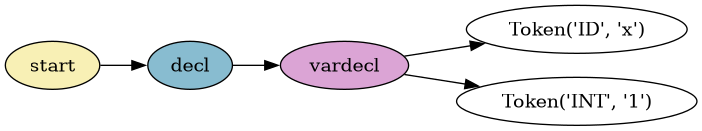

Tree('start', [Tree('decl', [Tree('vardecl', [Token('ID', 'x'), Token('INT', '1')])])])

In [5]:
plot_prgm("var x = 1 ;")

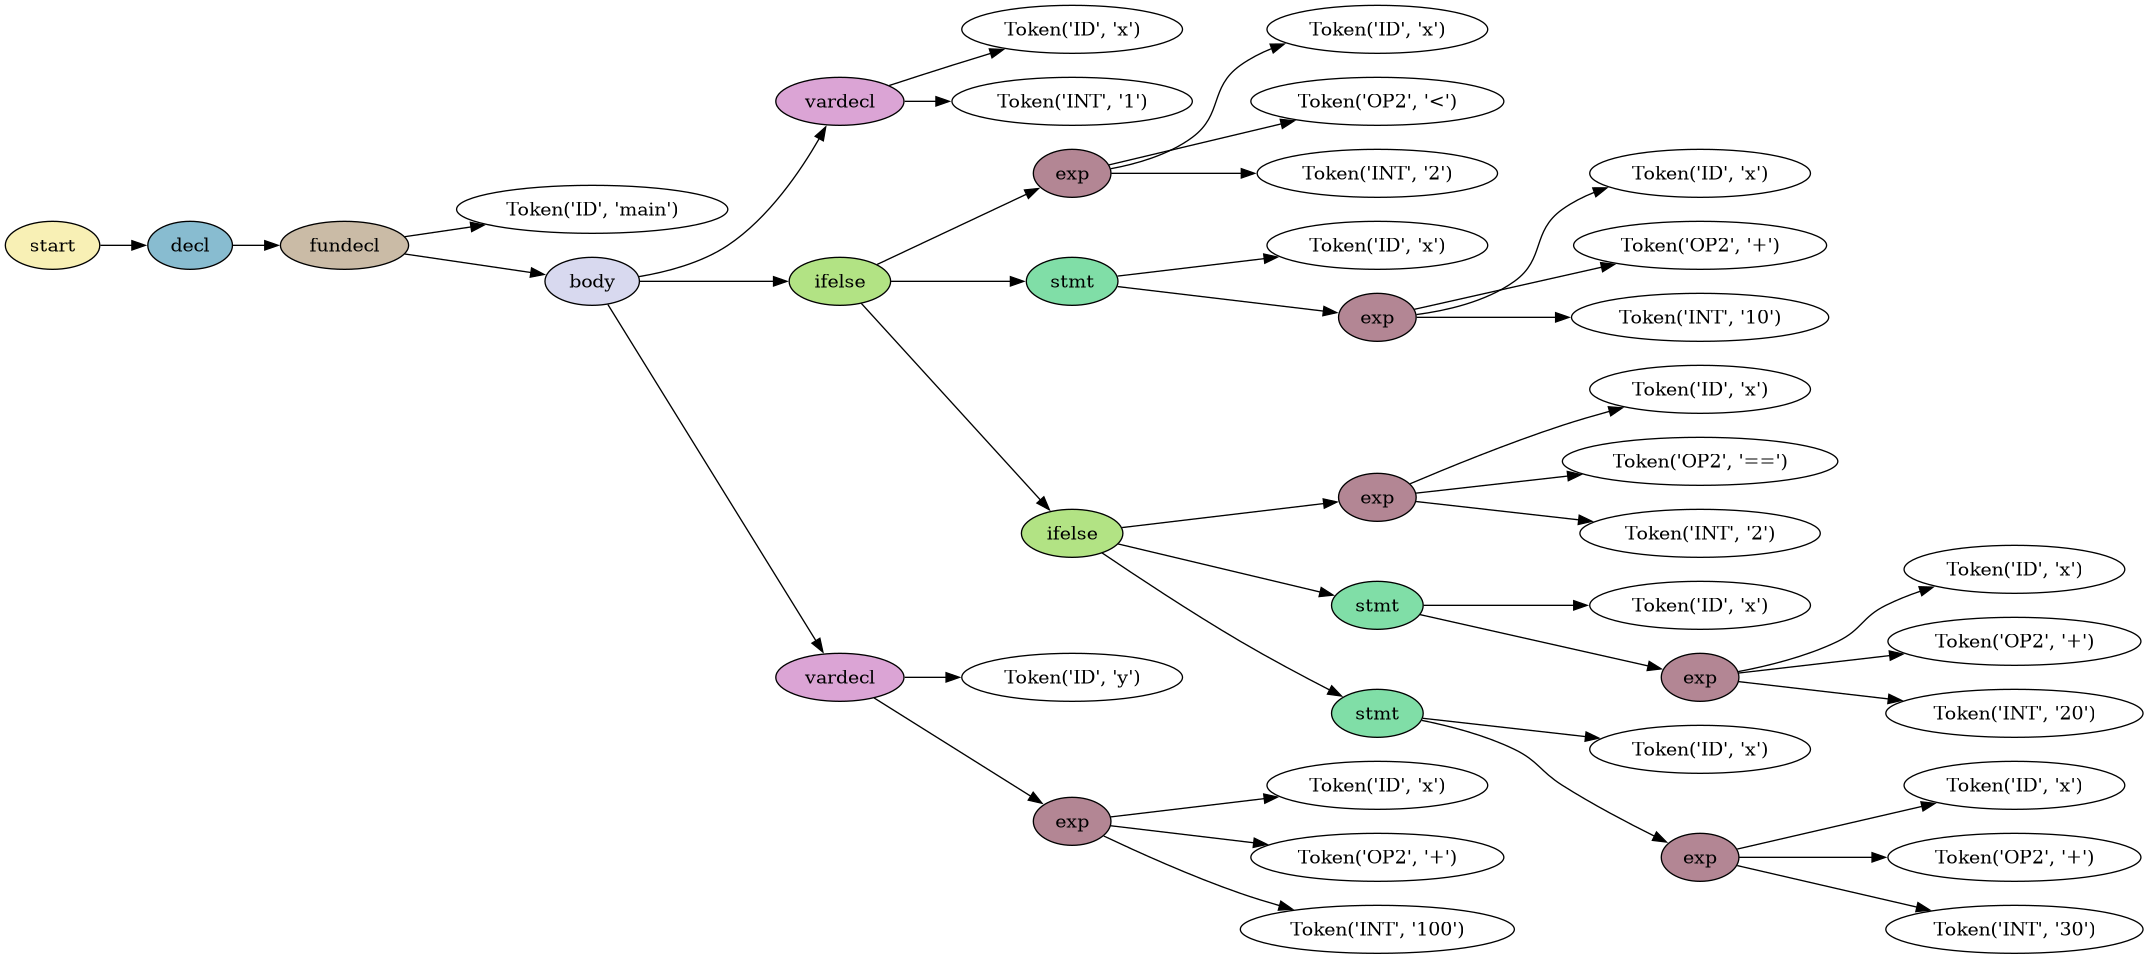

Tree('start', [Tree('decl', [Tree('fundecl', [Token('ID', 'main'), Tree('body', [Tree('vardecl', [Token('ID', 'x'), Token('INT', '1')]), Tree('ifelse', [Tree('exp', [Token('ID', 'x'), Token('OP2', '<'), Token('INT', '2')]), Tree('stmt', [Token('ID', 'x'), Tree('exp', [Token('ID', 'x'), Token('OP2', '+'), Token('INT', '10')])]), Tree('ifelse', [Tree('exp', [Token('ID', 'x'), Token('OP2', '=='), Token('INT', '2')]), Tree('stmt', [Token('ID', 'x'), Tree('exp', [Token('ID', 'x'), Token('OP2', '+'), Token('INT', '20')])]), Tree('stmt', [Token('ID', 'x'), Tree('exp', [Token('ID', 'x'), Token('OP2', '+'), Token('INT', '30')])])])]), Tree('vardecl', [Token('ID', 'y'), Tree('exp', [Token('ID', 'x'), Token('OP2', '+'), Token('INT', '100')])])])])])])

In [6]:
plot_prgm( \
     """
main() {
    var x = 1;

    if (x < 2) { 
		x = x + 10;
    } else { 
		if (x == 2){
			x = x + 20;
		} else {
			x = x + 30;
		}
    }

    var y = x + 100;
}

""")